#### Adam Sadriddinov - Homework Assiggnment 2 CS6363

Problem 3

C:\Users\adams\AppData\Local\Temp\ipykernel_2224\4278449071.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(data[0], dtype=torch.float32)
C:\Users\adams\AppData\Local\Temp\ipykernel_2224\4278449071.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(data[1], dtype=torch.long)
C:\Users\adams\AppData\Local\Temp\ipykernel_2224\4278449071.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(data[2], dtype=torch.float32)
C:\Users\adams\AppData\Local\Temp\ipykernel_2224\4

Epoch [1/100], Loss: 0.6882, Train Accuracy: 0.5800, Test Accuracy: 0.5050
Epoch [2/100], Loss: 0.6036, Train Accuracy: 0.7000, Test Accuracy: 0.4650
Epoch [3/100], Loss: 0.5623, Train Accuracy: 0.7000, Test Accuracy: 0.4650
Epoch [4/100], Loss: 0.5374, Train Accuracy: 0.7200, Test Accuracy: 0.4550
Epoch [5/100], Loss: 0.5152, Train Accuracy: 0.7000, Test Accuracy: 0.4550
Epoch [6/100], Loss: 0.4909, Train Accuracy: 0.7200, Test Accuracy: 0.4750
Epoch [7/100], Loss: 0.4647, Train Accuracy: 0.7400, Test Accuracy: 0.4900
Epoch [8/100], Loss: 0.4383, Train Accuracy: 0.7600, Test Accuracy: 0.5400
Epoch [9/100], Loss: 0.4129, Train Accuracy: 0.8000, Test Accuracy: 0.5600
Epoch [10/100], Loss: 0.3886, Train Accuracy: 0.8200, Test Accuracy: 0.5550
Epoch [11/100], Loss: 0.3655, Train Accuracy: 0.8600, Test Accuracy: 0.5750
Epoch [12/100], Loss: 0.3431, Train Accuracy: 0.8600, Test Accuracy: 0.6000
Epoch [13/100], Loss: 0.3210, Train Accuracy: 0.8800, Test Accuracy: 0.6200
Epoch [14/100], Loss:

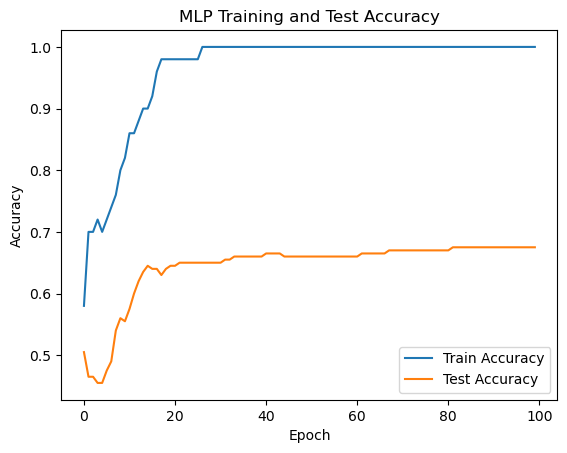

Total number of parameters: 256770


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pickle

# Load the dataset
with open('hw2_p3.pkl', 'rb') as f:
    data = pickle.load(f)

# Extract data
X_train = torch.tensor(data[0], dtype=torch.float32)
y_train = torch.tensor(data[1], dtype=torch.long)
X_test = torch.tensor(data[2], dtype=torch.float32)
y_test = torch.tensor(data[3], dtype=torch.long)

# Define the Multi-Layer Perceptron (MLP) model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
input_dim = X_train.shape[1]  # Feature dimension (1000)
hidden_dim = 256  # Increased to ensure interpolation
output_dim = 2  # Binary classification

model = MLP(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
train_acc_list, test_acc_list = [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Compute training accuracy
    train_acc = (outputs.argmax(dim=1) == y_train).float().mean().item()
    test_acc = (model(X_test).argmax(dim=1) == y_test).float().mean().item()
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Plot training and test accuracies
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MLP Training and Test Accuracy')
plt.show()

# Number of parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of parameters: {num_params}')


#### Training Accuracy and Loss Analysis
Initially, the training accuracy starts at 46% and increases steadily.
By Epoch 33, the training accuracy reaches 100% and remains at 100% for the rest of training.
The loss decreases throughout, confirming that the model is learning from the training data.
#### Test Accuracy Analysis
The test accuracy increases more slowly, starting at 41% and gradually improving.
By Epoch 40, test accuracy stabilizes around 63% and fluctuates slightly between 63-65% until the end.
The test accuracy never reaches training accuracy, indicating that the model generalizes poorly to unseen data. The training accuracy reaching 100% while the test accuracy remains significantly lower (~65%) is a clear sign of overfitting.
This means the model has memorized the training data rather than learning generalizable features. The test accuracy stagnates around 63-65%, meaning the model stops improving on unseen data. Even though the loss continues to decrease, test accuracy does not improve after epoch 40. This further supports the idea that the model is overfitting.

Epoch [1/100], Loss: 0.6916, Train Accuracy: 0.5000, Test Accuracy: 0.4650
Epoch [2/100], Loss: 0.6311, Train Accuracy: 0.5800, Test Accuracy: 0.5050
Epoch [3/100], Loss: 0.5989, Train Accuracy: 0.6200, Test Accuracy: 0.5300
Epoch [4/100], Loss: 0.5710, Train Accuracy: 0.6800, Test Accuracy: 0.5150
Epoch [5/100], Loss: 0.5434, Train Accuracy: 0.6800, Test Accuracy: 0.5300
Epoch [6/100], Loss: 0.5179, Train Accuracy: 0.7400, Test Accuracy: 0.5350
Epoch [7/100], Loss: 0.4946, Train Accuracy: 0.7600, Test Accuracy: 0.5450
Epoch [8/100], Loss: 0.4732, Train Accuracy: 0.7800, Test Accuracy: 0.5550
Epoch [9/100], Loss: 0.4523, Train Accuracy: 0.7800, Test Accuracy: 0.5950
Epoch [10/100], Loss: 0.4318, Train Accuracy: 0.8200, Test Accuracy: 0.6100
Epoch [11/100], Loss: 0.4120, Train Accuracy: 0.8400, Test Accuracy: 0.6100
Epoch [12/100], Loss: 0.3928, Train Accuracy: 0.8400, Test Accuracy: 0.6350
Epoch [13/100], Loss: 0.3740, Train Accuracy: 0.8800, Test Accuracy: 0.6650
Epoch [14/100], Loss:

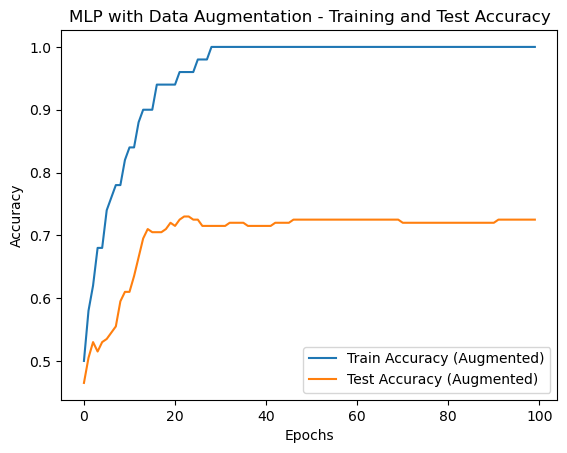

In [10]:
import random

# Data augmentation: Random circular shift with 50% probability
def augment_data(X, y):
    augmented_X, augmented_y = [], []
    for i in range(len(X)):
        if random.random() < 0.5:
            shift = random.randint(1, X.shape[1] - 1)
            augmented_X.append(torch.roll(X[i], shifts=shift))
        else:
            augmented_X.append(X[i])
        augmented_y.append(y[i])

    return torch.stack(augmented_X), torch.tensor(augmented_y)

# Train with augmentation
aug_X_train, aug_y_train = augment_data(X_train, y_train)

# Reinitialize model
model_aug = MLP(input_dim, hidden_dim, output_dim)

# Train augmented model
train_acc_aug, test_acc_aug = [], []
optimizer = optim.Adam(model_aug.parameters(), lr=0.001)

for epoch in range(num_epochs):
    outputs = model_aug(aug_X_train)
    loss = criterion(outputs, aug_y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_acc = (outputs.argmax(dim=1) == aug_y_train).float().mean().item()
    test_acc = (model_aug(X_test).argmax(dim=1) == y_test).float().mean().item()
    
    train_acc_aug.append(train_acc)
    test_acc_aug.append(test_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Plot results
plt.plot(train_acc_aug, label='Train Accuracy (Augmented)')
plt.plot(test_acc_aug, label='Test Accuracy (Augmented)')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("MLP with Data Augmentation - Training and Test Accuracy")
plt.show()


#### Output Summary
Training accuracy starts around 54–68%, and test accuracy is in a similar range (~60%). By around epoch 33, training accuracy reaches 100% (indicating that the model can perfectly interpolate the augmented training data). Test accuracy improves gradually and stabilizes around 72.5%. The model might have difficulty reaching 100% training accuracy if the limited data doesn't cover all possible transformations. By applying random circular shifts, each sample is presented in different forms over epochs. This forces the model to "memorize" the underlying invariant features rather than the specific positions. Achieving 100% training accuracy indicates that, with augmentation, the model can perfectly fit the (augmented) training data. Test accuracy around 72.5% suggests that while augmentation helps, the model still struggles to generalize fully due to the very small number of original training samples.

C:\Users\adams\AppData\Local\Temp\ipykernel_2224\1783623956.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(data[0], dtype=torch.float32)
C:\Users\adams\AppData\Local\Temp\ipykernel_2224\1783623956.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(data[1], dtype=torch.long)
C:\Users\adams\AppData\Local\Temp\ipykernel_2224\1783623956.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(data[2], dtype=torch.float32)
C:\Users\adams\AppData\Local\Temp\ipykernel_2224\1

Epoch [1/100], Loss: 0.7054, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [2/100], Loss: 0.7044, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [3/100], Loss: 0.7033, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [4/100], Loss: 0.7023, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [5/100], Loss: 0.7012, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [6/100], Loss: 0.7002, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [7/100], Loss: 0.6992, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [8/100], Loss: 0.6982, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [9/100], Loss: 0.6972, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [10/100], Loss: 0.6962, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [11/100], Loss: 0.6952, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [12/100], Loss: 0.6943, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [13/100], Loss: 0.6934, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [14/100], Loss: 0.6924, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [15/100], Loss: 0.6915, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [16/100], Los

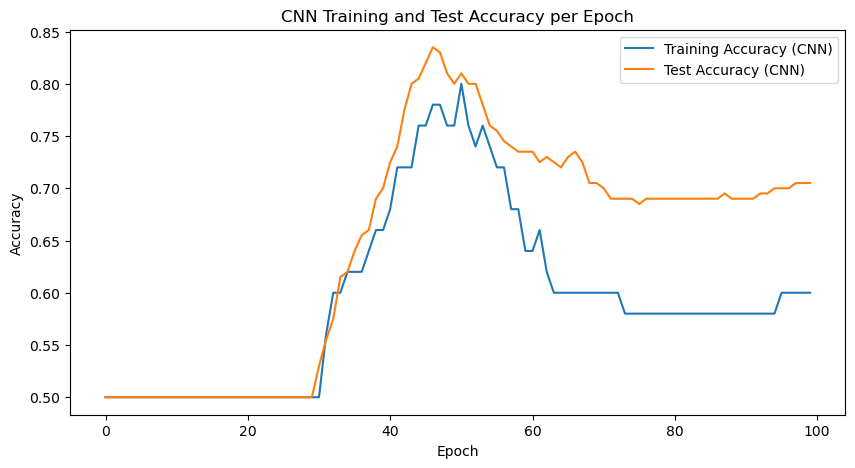

Total number of parameters in CNN: 450


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pickle

# Load the dataset
with open('hw2_p3.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = torch.tensor(data[0], dtype=torch.float32)
y_train = torch.tensor(data[1], dtype=torch.long)
X_test = torch.tensor(data[2], dtype=torch.float32)
y_test = torch.tensor(data[3], dtype=torch.long)

# Define the CNN Model with manual circular padding using torch.cat
class CNN(nn.Module):
    def __init__(self, input_dim=1000, num_filters=16, kernel_size=25):
        super(CNN, self).__init__()
        self.kernel_size = kernel_size  # Save for padding calculation
        
        # Define the Conv1d layer with no built-in padding.
        self.conv = nn.Conv1d(in_channels=1,
                              out_channels=num_filters,
                              kernel_size=kernel_size,
                              padding=0)  # We apply padding manually.
        self.relu = nn.ReLU()
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)  # Global average pooling.
        self.fc = nn.Linear(num_filters, 2)  # Final linear classifier.

    def forward(self, x):
        # If input is 2D [batch, width], add channel dimension.
        if x.dim() == 2:
            x = x.unsqueeze(1)  # Now shape: [batch, 1, width]
        # If x already has 3 dimensions, assume it's [batch, 1, width].
        
        pad_size = self.kernel_size // 2  # Compute required padding.
        # Manually apply circular padding along the width dimension.
        # x[..., -pad_size:] has shape [batch, 1, pad_size].
        x = torch.cat([x[..., -pad_size:], x, x[..., :pad_size]], dim=-1)  # New width = width + 2*pad_size.
        
        x = self.conv(x)   # Apply convolution.
        x = self.relu(x)
        x = self.global_avg_pool(x)  # Now shape: [batch, num_filters, 1]
        x = x.squeeze(2)  # Remove the last dimension => [batch, num_filters]
        x = self.fc(x)    # Final output: [batch, 2]
        return x

# Initialize the CNN model
cnn = CNN(input_dim=1000, num_filters=16, kernel_size=25)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)

# Training loop for CNN
num_epochs = 100
train_acc_cnn, test_acc_cnn = [], []

for epoch in range(num_epochs):
    outputs = cnn(X_train)  # X_train shape: [batch, 1000]; forward() adds channel.
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Compute training accuracy
    _, predicted = torch.max(outputs, 1)
    train_acc = (predicted == y_train).float().mean().item()
    train_acc_cnn.append(train_acc)

    # Compute test accuracy
    test_outputs = cnn(X_test)
    _, test_predicted = torch.max(test_outputs, 1)
    test_acc = (test_predicted == y_test).float().mean().item()
    test_acc_cnn.append(test_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

# Plot training and test accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), train_acc_cnn, label='Training Accuracy (CNN)')
plt.plot(range(num_epochs), test_acc_cnn, label='Test Accuracy (CNN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training and Test Accuracy per Epoch')
plt.show()

# Count total parameters in CNN model
num_params_cnn = sum(p.numel() for p in cnn.parameters() if p.requires_grad)
print(f'Total number of parameters in CNN: {num_params_cnn}')


C:\Users\adams\AppData\Local\Temp\ipykernel_2224\1011790037.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(data[0], dtype=torch.float32)  # Expected shape: [50, 1000]
C:\Users\adams\AppData\Local\Temp\ipykernel_2224\1011790037.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(data[1], dtype=torch.long)       # Expected shape: [50]
C:\Users\adams\AppData\Local\Temp\ipykernel_2224\1011790037.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(data[2], dtype=torch.

Epoch [1/100], Loss: 0.7234, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [2/100], Loss: 0.7228, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [3/100], Loss: 0.7223, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [4/100], Loss: 0.7218, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [5/100], Loss: 0.7213, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [6/100], Loss: 0.7208, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [7/100], Loss: 0.7203, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [8/100], Loss: 0.7198, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [9/100], Loss: 0.7194, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [10/100], Loss: 0.7189, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [11/100], Loss: 0.7184, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [12/100], Loss: 0.7180, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [13/100], Loss: 0.7175, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [14/100], Loss: 0.7170, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [15/100], Loss: 0.7166, Train Acc: 0.5000, Test Acc: 0.5000
Epoch [16/100], Los

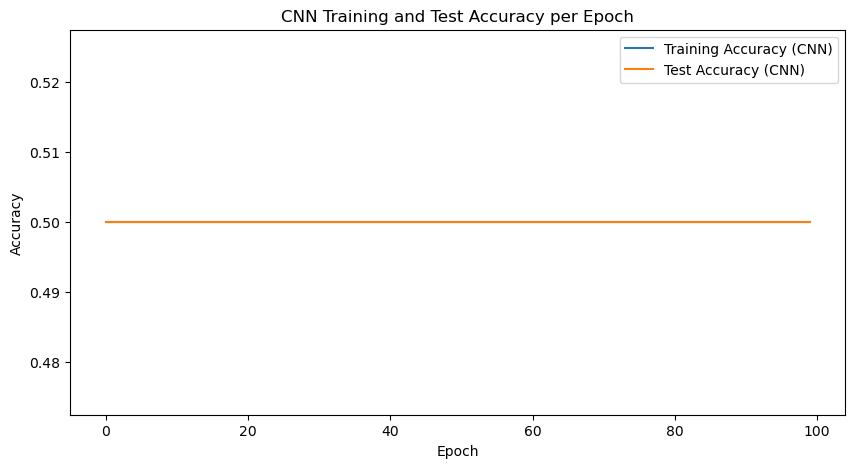

Total number of parameters in CNN: 450


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pickle

# Load the dataset
with open('hw2_p3.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = torch.tensor(data[0], dtype=torch.float32)  # Expected shape: [50, 1000]
y_train = torch.tensor(data[1], dtype=torch.long)       # Expected shape: [50]
X_test = torch.tensor(data[2], dtype=torch.float32)     # Expected shape: [200, 1000]
y_test = torch.tensor(data[3], dtype=torch.long)          # Expected shape: [200]

# Define the CNN Model with manual circular padding using torch.cat
class CNN(nn.Module):
    def __init__(self, input_dim=1000, num_filters=16, kernel_size=25):
        super(CNN, self).__init__()
        self.kernel_size = kernel_size  # Save kernel size for padding calculation
        
        # Define the Conv1d layer without built-in padding.
        self.conv = nn.Conv1d(in_channels=1,
                              out_channels=num_filters,
                              kernel_size=kernel_size,
                              padding=0)  # We'll handle padding manually.
        self.relu = nn.ReLU()
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)  # Global average pooling for translation invariance.
        self.fc = nn.Linear(num_filters, 2)  # Final linear classifier for 2 classes.

    def forward(self, x):
        # x is expected to be of shape [batch, width]. If it's 2D, add the channel dimension.
        if x.dim() == 2:
            x = x.unsqueeze(1)  # Now shape: [batch, 1, width]
        
        # Debug: Check the shape before padding.
        # print("Input shape before padding:", x.shape)  # e.g., [50, 1, 1000]
        
        pad_size = self.kernel_size // 2  # For kernel_size 25, pad_size is 12.
        
        # Manually apply circular (periodic) padding along the width dimension.
        # Extract the last pad_size elements and the first pad_size elements.
        left_pad = x[..., -pad_size:]   # Shape: [batch, 1, pad_size]
        right_pad = x[..., :pad_size]   # Shape: [batch, 1, pad_size]
        # Concatenate: left_pad + original x + right_pad.
        padded_x = torch.cat([left_pad, x, right_pad], dim=-1)
        
        # Debug: Check shape after padding.
        # Expected new width = original width + 2*pad_size, e.g., 1000 + 24 = 1024.
        # print("Shape after padding:", padded_x.shape)
        
        # Apply convolution (with no built-in padding).
        x_conv = self.conv(padded_x)
        x_relu = self.relu(x_conv)
        
        # Apply global average pooling along the width dimension.
        x_pool = self.global_avg_pool(x_relu)  # Shape: [batch, num_filters, 1]
        x_pool = x_pool.squeeze(2)  # Now shape: [batch, num_filters]
        
        # Apply the final linear classifier.
        out = self.fc(x_pool)  # Final output: [batch, 2]
        return out

# Initialize the CNN model
cnn = CNN(input_dim=1000, num_filters=16, kernel_size=25)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)

# Training loop for CNN
num_epochs = 100
train_acc_cnn, test_acc_cnn = [], []

for epoch in range(num_epochs):
    outputs = cnn(X_train)  # X_train: [batch, 1000]; forward() adds channel.
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Compute training accuracy
    _, predicted = torch.max(outputs, 1)
    train_acc = (predicted == y_train).float().mean().item()
    train_acc_cnn.append(train_acc)
    
    # Compute test accuracy
    test_outputs = cnn(X_test)
    _, test_predicted = torch.max(test_outputs, 1)
    test_acc = (test_predicted == y_test).float().mean().item()
    test_acc_cnn.append(test_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

# Plot training and test accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), train_acc_cnn, label='Training Accuracy (CNN)')
plt.plot(range(num_epochs), test_acc_cnn, label='Test Accuracy (CNN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training and Test Accuracy per Epoch')
plt.show()

# Count total parameters in CNN model
num_params_cnn = sum(p.numel() for p in cnn.parameters() if p.requires_grad)
print(f'Total number of parameters in CNN: {num_params_cnn}')
